Number of files per channel: 203
{'cmap': 'gray', 'norm': <matplotlib.colors.Normalize object at 0x7f6b838a5f98>, 'interpolation': 'nearest', 'origin': 'lower'}
{'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f6ba908e7f0>, 'norm': <matplotlib.colors.LogNorm object at 0x7f6b858455c0>, 'interpolation': 'nearest', 'origin': 'lower'}
{'cmap': 'gray', 'norm': <matplotlib.colors.Normalize object at 0x7f6b839987b8>, 'interpolation': 'nearest', 'origin': 'lower'}
{'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f6ba908e898>, 'norm': <matplotlib.colors.LogNorm object at 0x7f6b8d7aea58>, 'interpolation': 'nearest', 'origin': 'lower'}
{'cmap': 'gray', 'norm': <matplotlib.colors.Normalize object at 0x7f6b84bcf978>, 'interpolation': 'nearest', 'origin': 'lower'}
{'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f6ba908e9e8>, 'norm': <matplotlib.colors.LogNorm object at 0x7f6b84c6e6d8>, 'interpolation': 'nearest', 'origin': 'lower'}


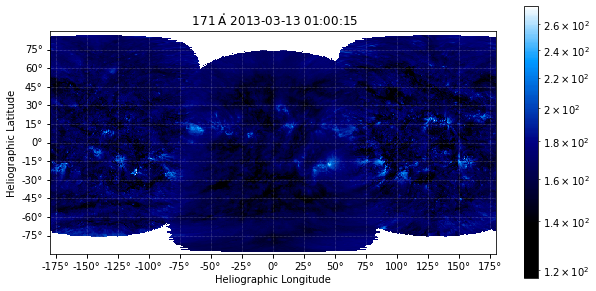

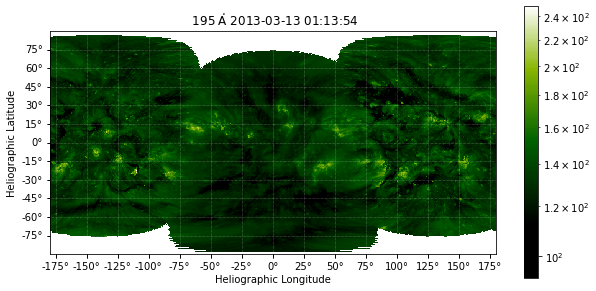

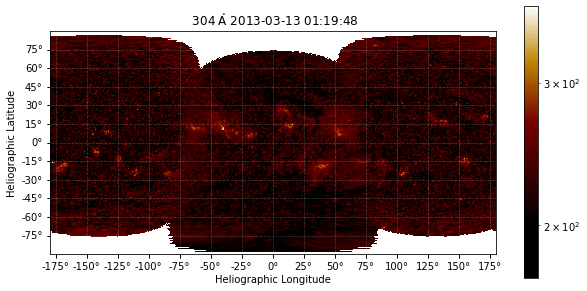

In [35]:
# Imports
import numpy as np
import sunpy
import sunpy.map
import sunpy.sun
from sunpy.map.maputils import all_coordinates_from_map
from sunpy.coordinates import get_horizons_coord
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import astropy.units as u
from astropy.visualization.mpl_normalize import ImageNormalize
import glob


class synchronic_map():
    def __init__(self):
        pass

    def plot_map_object(self, map_object, cmap):

        ny, nx = map_object.data.shape
        print(map_object.plot_settings)
        map_object.plot_settings['cmap'] = plt.get_cmap(cmap)
        # map_object.plot_settings['norm'] = ImageNormalize(map_object.data)
        map_object.plot_settings['norm'] = colors.LogNorm()
        print(map_object.plot_settings)

        plt.figure(figsize=(10, 5))
        ax = plt.subplot(projection=map_object.wcs)
        im = map_object.plot()
        lon, lat = ax.coords
        lon.set_coord_type("longitude")
        lon.coord_wrap = 180
        lon.set_format_unit(u.deg)
        lat.set_coord_type("latitude")
        lat.set_format_unit(u.deg)
        lon.set_axislabel('Heliographic Longitude', minpad=0.8)
        lat.set_axislabel('Heliographic Latitude', minpad=0.9)
        lon.set_ticks(spacing=25 * u.deg, color='k')
        lat.set_ticks(spacing=15 * u.deg, color='k')
        plt.colorbar(im, ax=ax)

        # Reset the view to pixel centers
        _ = ax.axis((0, nx, 0, ny))
        plt.show()

In [ ]:
# Class
sync_class = synchronic_map()

# Channels
nb_channels = 3
cmaps = ['sohoeit171', 'sohoeit195', 'sohoeit304']

# Files
path_to_files = '/media/btremblay/My Passport/dir.Files/dir.Backups/dir.HW20/'
filenames_171 = sorted(glob.glob(path_to_files+'fullSunMap_171_eit_l1_*'))
filenames_195 = sorted(glob.glob(path_to_files+'fullSunMap_195_eit_l1_*'))
filenames_304 = sorted(glob.glob(path_to_files+'fullSunMap_304_eit_l1_*'))
nb_files = len(filenames_195)
print('Number of files per channel: {0}'.format(nb_files))

In [ ]:
# Load all map objects
# sync_maps_171 = sunpy.map.Map(filenames_171)
# sync_maps_195 = sunpy.map.Map(filenames_195)
# sync_maps_304 = sunpy.map.Map(filenames_304)

In [ ]:
# Load map object and plot
# for i in range(nb_files):
for i in range(1):
    sync_map_171 = sunpy.map.Map(filenames_171[i])
    sync_class.plot_map_object(sync_map_171, cmaps[0])
    sync_map_195 = sunpy.map.Map(filenames_195[i])
    sync_class.plot_map_object(sync_map_195, cmaps[1])
    sync_map_304 = sunpy.map.Map(filenames_304[i])
    sync_class.plot_map_object(sync_map_304, cmaps[2])